In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
df=pd.read_csv('sales_data_EDA_final.csv')
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0,0.252232,249.8092,23.0,6.417137,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.920000,1,0.268136,48.2692,13.0,3.964431,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500000,0,0.255913,141.6180,23.0,5.632405,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,13.650000,1,0.233562,57.6588,35.0,3.742265,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,12.857645,0,0.503272,107.7622,37.0,6.525631,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,6.865000,0,0.384362,214.5218,35.0,6.002014,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
7993,8.380000,1,0.360838,108.1570,20.0,4.160967,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
7994,10.600000,0,0.327686,85.1224,18.0,4.958269,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
7995,7.210000,1,0.525625,103.1332,13.0,5.472011,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [5]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [6]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [7]:
model=DecisionTreeRegressor(random_state=1)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [8]:
#evaluate the model
#training_data
print('#'*50)
print('Training Data Evaluation')
print('#'*50)
y_pred=model.predict(x_train)

r2=r2_score(y_train,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_train,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_train,y_pred)
print('MAE==',mae)

print('#'*50)
print('Testing Data Evaluation')
print('#'*50)

y_pred=model.predict(x_test)

r2=r2_score(y_test,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_test,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE==',mae)

##################################################
Training Data Evaluation
##################################################
R2 Score== 1.0
MSE== 0.0
MAE== 0.0
##################################################
Testing Data Evaluation
##################################################
R2 Score== 0.40285796986934297
MSE== 0.7222662333311166
MAE== 0.6666034812888278


In [9]:
result = model.cost_complexity_pruning_path(x_train,y_train)

# dt_model= DecisionTreeRegressor()
result

{'ccp_alphas': array([0.00000000e+00, 5.55371843e-19, 5.55371843e-19, ...,
        5.14365266e-02, 1.29735114e-01, 2.63201038e-01]),
 'impurities': array([-7.80019753e-16, -7.79464381e-16, -7.78909010e-16, ...,
         6.10498706e-01,  9.99704047e-01,  1.26290508e+00])}

In [10]:
ccp_alpha_value = result['ccp_alphas']
ccp_alpha_value

array([0.00000000e+00, 5.55371843e-19, 5.55371843e-19, ...,
       5.14365266e-02, 1.29735114e-01, 2.63201038e-01])

In [11]:
train_data_acc =[]
test_data_acc =[]

for ccp in ccp_alpha_value:
    dt_model= DecisionTreeRegressor(ccp_alpha = ccp)
    dt_model.fit(x_train,y_train)
    
    test_acc = dt_model.score(x_test,y_test)
    train_acc = dt_model.score(x_train,y_train)
    
    train_data_acc.append(train_acc)
    test_data_acc.append(test_acc)

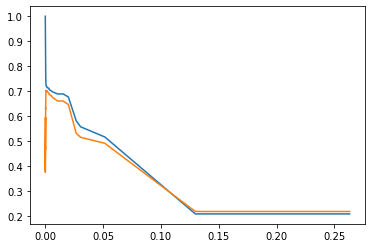

In [12]:
plt.plot(ccp_alpha_value,train_data_acc)
plt.plot(ccp_alpha_value,test_data_acc)

In [21]:
# Hyperparameter Tuning
model=DecisionTreeRegressor(random_state=10)

hyp={'ccp_alpha':[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009]}

gscv_model=GridSearchCV(model,hyp,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'ccp_alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                       0.0006, 0.0007, 0.0008, 0.0009]})

In [22]:
gscv_model.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0008, random_state=10)

In [23]:
model_final=gscv_model.best_estimator_
model_final.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0008, random_state=10)

In [25]:
#evaluate the model
#training_data
print('#'*50)
print('Training Data Evaluation')
print('#'*50)
y_pred=model_final.predict(x_train)

r2=r2_score(y_train,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_train,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_train,y_pred)
print('MAE==',mae)

print('#'*50)
print('Testing Data Evaluation')
print('#'*50)

y_pred=model_final.predict(x_test)

r2=r2_score(y_test,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_test,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE==',mae)

##################################################
Training Data Evaluation
##################################################
R2 Score== 0.7229641529510142
MSE== 0.34986997991648877
MAE== 0.46348361394991355
##################################################
Testing Data Evaluation
##################################################
R2 Score== 0.7022146367941788
MSE== 0.36018284054925176
MAE== 0.46724866157900635


In [17]:
import pickle

In [18]:
with open ('model.pkl','wb') as file:
    pickle.dump(model_final,file)